 # **LAB 7**
# Random Walk

In [1]:
import math
import numpy as np
from random import random, choice, uniform
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# ------------------------------- 1


In [2]:
def randomWalk(N, p, l):
    dist = 0
    # yield 0
    for i in range(N):
        step = 1 if uniform(0,1) > p else -1
        dist += (step * l)
        yield dist
    yield abs(dist)

In [3]:
def experiment(N, p, l, trials):
    results = []
    for i in range(trials):
        results.append(list(randomWalk(N, p, l)))
    results = np.array(results)
    # print(results.shape)
    mean = np.mean(results, axis = 0)
    var = np.var(results, axis = 0)
    return mean, var

(A) Avg dist vs time

In [4]:
exp1 = experiment(25, 0.5, 1, 50)
meanDist = exp1[0][-1]
var = exp1[1][-1]
print(meanDist, "\u00B1", var)

4.32 ± 9.857599999999996


In [5]:
p = 0.5
trials = [10, 100, 1000, 10000]
Ns = range(1, 101)
l = 1

In [6]:
distances = []
variances = []
positions = []
for trial in trials:
    distance, pos, variance = zip(*[(exp[0][-1], exp[0][-2], exp[1][-2]) for exp in [experiment(N, p, l, trial) for N in Ns]])
    distances.append(distance)
    variances.append(variance)
    positions.append(pos)

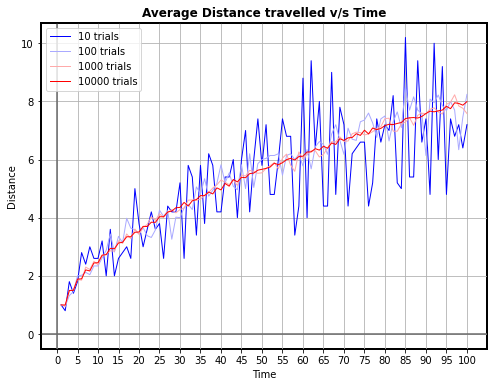

In [7]:
fig, ax = plt.subplots(figsize = (8,6))
color = iter(cm.bwr(np.linspace(0, 1, len(trials))))

for i in range(len(trials)):
    ax.plot(Ns, distances[i], label = f"{trials[i]} trials", color = next(color), lw = 1)
    
ax.set_title(f"Average Distance travelled v/s Time", fontweight = 'bold')
ax.set_xlabel(f"Time")
ax.set_ylabel(f"Distance")
ax.set_xticks(range(0,len(Ns)+1,5))

ax.axhline(0, color='dimgrey')
ax.axvline(0, color='dimgrey')
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth(2)
ax.grid()
ax.legend()
plt.show(fig)

In [8]:
import statistics as stats
for distance in distances:
    print(stats.correlation(Ns, distance))

0.7531689550521713
0.9568641706142758
0.97848830522694
0.9817841841262422


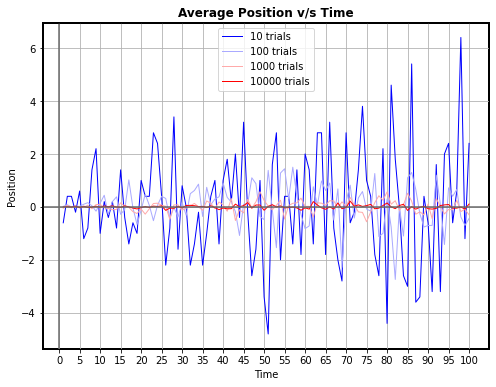

In [9]:
fig, ax = plt.subplots(figsize = (8,6))
color = iter(cm.bwr(np.linspace(0, 1, len(trials))))

for i in range(len(trials)):
    ax.plot(Ns, positions[i], label = f"{trials[i]} trials", color = next(color), lw = 1)
    
ax.set_title(f"Average Position v/s Time", fontweight = 'bold')
ax.set_xlabel(f"Time")
ax.set_ylabel(f"Position")
ax.set_xticks(range(0,len(Ns)+1,5))

ax.axhline(0, color='dimgrey')
ax.axvline(0, color='dimgrey')
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth(2)
ax.grid()
ax.legend()
plt.show(fig)

---

(B) Variance v/s time

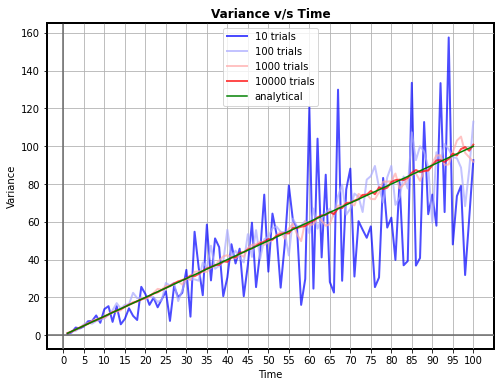

In [10]:
fig, ax = plt.subplots(figsize = (8,6))
color = iter(cm.bwr(np.linspace(0, 1, len(trials))))

for i in range(len(trials)):
    ax.plot(Ns, variances[i], label = f"{trials[i]} trials", color = next(color), lw = 2, alpha = 0.7)
ax.plot(Ns, [n*l**2 for n in Ns], label = 'analytical', color = 'green', lw = 1.5)
ax.set_title(f"Variance v/s Time", fontweight = 'bold')
ax.set_xlabel(f"Time")
ax.set_ylabel(f"Variance")
ax.set_xticks(range(0,len(Ns)+1,5))

ax.axhline(0, color='dimgrey')
ax.axvline(0, color='dimgrey')
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth(2)
ax.grid()
ax.legend()
plt.show(fig)

In [11]:
for variance in variances:
    print(stats.correlation(Ns, variance))

0.6879042415692604
0.9683008626603726
0.996068358284667
0.9996939477447898


(C) Histogram of the final position

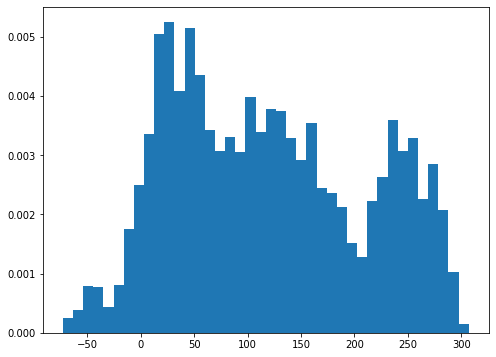

In [12]:
exp1 = randomWalk(100000, 0.5, 1)
positions = list(exp1)[:-1]
# print(len(positions))
plt.figure(figsize = (8,6))
plt.hist(positions, bins = 40, density = True)
plt.show()

In [18]:
exp2 = experiment(100, 0.5, 1, 100)
positions = exp2[0][:-1]
print(positions)

[ 0.04 -0.08 -0.18 -0.22 -0.34 -0.22 -0.28 -0.38 -0.38 -0.26 -0.44 -0.24
 -0.04  0.04  0.08  0.18  0.18  0.16  0.14  0.04  0.    0.14  0.04 -0.1
  0.04  0.    0.08  0.1   0.1   0.16  0.1   0.2   0.24  0.12  0.14  0.14
  0.02  0.   -0.08 -0.1  -0.04 -0.2  -0.1  -0.12 -0.28 -0.36 -0.26 -0.36
 -0.14 -0.26 -0.62 -0.68 -0.58 -0.52 -0.52 -0.58 -0.6  -0.62 -0.58 -0.6
 -0.66 -0.66 -0.6  -0.6  -0.64 -0.58 -0.54 -0.34 -0.12 -0.28 -0.32 -0.22
 -0.28 -0.32 -0.24 -0.34 -0.3  -0.34 -0.4  -0.18 -0.12  0.02  0.04  0.16
  0.1   0.08  0.12  0.08  0.16  0.2   0.26  0.16  0.06  0.    0.   -0.02
 -0.08  0.02  0.   -0.08]


In [89]:
def histdata(N, p, l, trials):
    results = []
    for i in range(trials):
        results.append(list(randomWalk(N, p, l)))
    results = np.array(results)
    return results.reshape(-1)

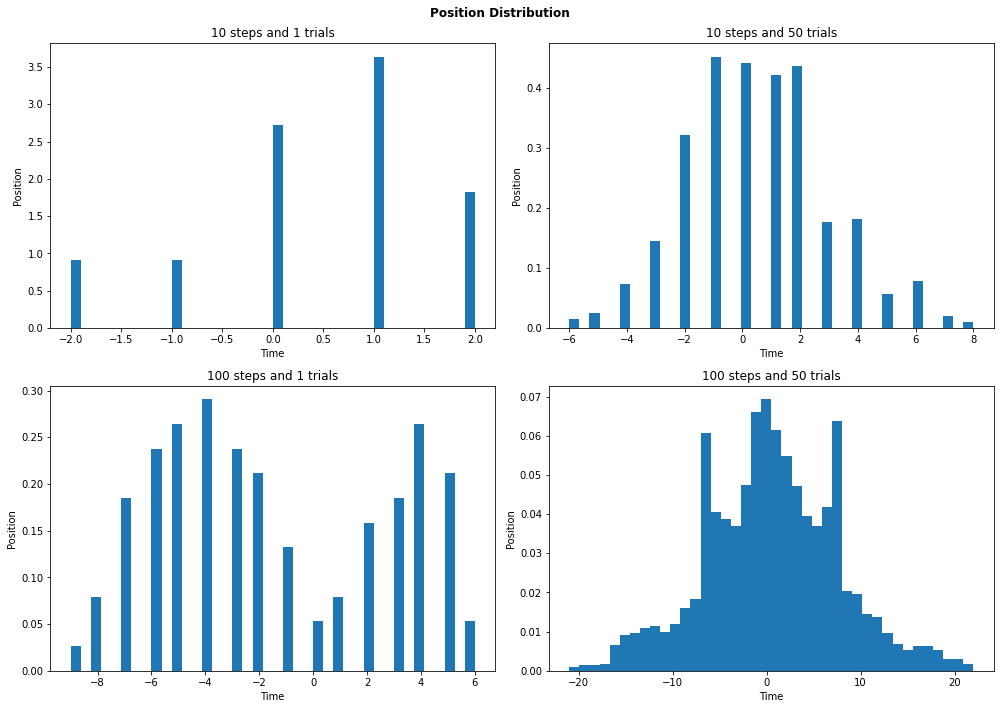

In [107]:
N = [10, 100]
trials = [1, 50]
fig, ax = plt.subplots(2, 2, figsize = (14,10))
for i in range(4):
    ax[i//2, i%2].hist(histdata(N[i//2], 0.5, 1, trials[i%2]), bins = 40, density = True)
    ax[i//2, i%2].set_xlabel(f"Time")
    ax[i//2, i%2].set_ylabel(f"Position")
    ax[i//2, i%2].set_title(f"{N[i//2]} steps and {trials[i%2]} trials")
fig.suptitle(f"Position Distribution", fontweight = 'bold')
plt.tight_layout()
plt.show(fig)

(D) Assuming that step length follows a normal distribution N (μ, σ), numerically examine the mean and variance with time.

In [108]:
def randomWalk(N, p):
    dist = 0
    l = np.random.normal(0, 1)
    # yield 0
    for i in range(N):
        step = 1 if uniform(0,1) > p else -1
        dist += (step * l)
        yield dist
    yield abs(dist)

In [111]:
def experiment2(N, p, trials):
    results = []
    for i in range(trials):
        results.append(list(randomWalk(N, p)))
    results = np.array(results)
    # print(results.shape)
    mean = np.mean(results, axis = 0)
    var = np.var(results, axis = 0)
    return mean, var

In [127]:
trials = [1, 10, 100, 1000]
exp = experiment2(100, 0.5, trials[-1])
print(exp[0])

[-1.31110223e-02  1.47620001e-02 -1.59069239e-02  1.00920670e-02
  3.90587935e-02  7.37270601e-02  7.61060183e-02  5.64634111e-02
  4.75471482e-02  4.17132075e-02  6.17170668e-02  2.63280866e-02
  6.18363822e-03 -9.14846217e-04 -2.37989721e-02 -3.66261991e-02
 -5.30045393e-02 -8.28512560e-02 -2.91706675e-02 -7.37135048e-02
 -6.79503211e-02 -1.25248216e-01 -1.33584344e-01 -8.70751491e-02
 -1.18614521e-01 -1.15645532e-01 -1.48624981e-01 -1.58594775e-01
 -1.28729273e-01 -1.56446553e-01 -1.04251774e-01 -6.72350716e-02
 -8.62710415e-02 -9.60696238e-02 -1.12222693e-01 -7.34923617e-02
 -2.14178361e-02 -2.44902161e-02 -7.02707633e-02 -8.13665797e-02
 -6.67098188e-02 -4.07812848e-02 -1.14949997e-01 -1.55184646e-01
 -1.97491872e-01 -2.14082867e-01 -2.62899145e-01 -2.59873293e-01
 -2.38903981e-01 -2.16566412e-01 -2.14691313e-01 -1.54469461e-01
 -1.30200887e-01 -1.08982878e-01 -1.22172532e-01 -1.51531131e-01
 -1.34674035e-01 -1.33877670e-01 -9.37118040e-02 -1.65744028e-02
  1.68814383e-02  1.43742

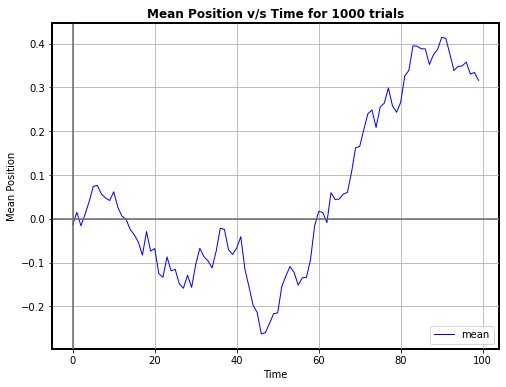

In [128]:
fig, ax = plt.subplots(figsize = (8,6))
color = iter(cm.bwr(np.linspace(0, 1, len(trials))))

ax.plot(exp[0][:-1], label = f"mean", color = 'blue', lw = 1)
    
ax.set_title(f"Mean Position v/s Time for {trials[-1]} trials", fontweight = 'bold')
ax.set_xlabel(f"Time")
ax.set_ylabel(f"Mean Position")

ax.axhline(0, color='dimgrey')
ax.axvline(0, color='dimgrey')
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth(2)
ax.grid()
ax.legend()
plt.show(fig)


---

In [14]:
def randomWalk2(N, p, l):
    walk = 0
    pos = []
    for i in range(N):
        step = np.random.rand()
        if(step<=p):
            walk += l
        else:
            walk -= l
        pos += [walk]
    return abs(walk), pos

In [15]:
randomWalk2(10, 0.5, 1)

(2, [1, 0, -1, -2, -3, -4, -3, -4, -3, -2])

# ------------------------------- 2
